# *Lecture 15*

# Ordinary Differential Equations

| |
|:---:|
|Selected Content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

### Introduction

Many physics problems deal with time dependence or position dependence of a system.
The description of how the system varies in time and space (or another independent variable) is often given by a differential equation.
In fact, any dynamic system subject to Newton's Laws has a differential equation at its heart:

$$\frac{1}{m} F(x) = \frac{d^2 x}{dt^2}$$

We will concentrate in this lecture on the solutions for a *single* differential equation, especially equations of motion in one dimension.
During the next lecture, we will concentrate on *systems* of differential equations that have multiple coordinates and generalized coordinates ($x,p$).
Then, next week, we will introduce boundary conditions and eigenvalues in physical systems.
These are the "ODE applications" that are typically used in computational physics.  (In some classes, the ODE solvers are the main focus!)


### Definitions/Terminology (Types of Differential Equations)

The **order** of a differential equation refers to the degree of the derivative.
For example,

$$\frac{dy}{dt} = -3 t^2 + t^9 + y^7$$

is still a first-order differential equation, even though the first derivative is itself a function of higher orders of $t$ and $y$.
We will treat all orders of differential equations, but only the first two orders are typically used in physics cases.

The **ordinary** differential equations contain only 1 independent variable, so that all of the derivatives are taken with respect to that variable.
For example, 

$$\frac{dy}{dt} = f(t,y)$$ 

is still an ordinary differential equation because $y(t)$ itself is a simple function of the independent variable $t$.
(An example of a **partial** differential equation would be $\frac{\partial y}{\partial t} = f(t, x, y)$, with the understanding that $y(x,t)$ is a function of both $x$ and $t$.)

The **linear** differential equations have only the first power of a function or a derivative (may be a second-order derivative or even an $n$th-order derivative).
A **non-linear** equation has higher powers of the derivative.
For example,

$$\frac{dy}{dt} = y(t) - y^2(t)$$

is a nonlinear equation because it contains a higher power of $y$.
This higher power means that a linear combination of solutions will not itself be a solution.

Please note that in all of these forms the right-hand side of the equation is just a **derivative function** that describes the combination of derivatives on the left-hand side.
When you see $f(t, y)$ in the following explanations, think of a derivative.

We usually concentrate on linear differential equations because these can be solved with analytic methods, but now we will develop numerical methods to solve even nonlinear systems.

### Example: Nonlinear Oscillations

Consider a mass $m$ attached to a spring that exerts a restoring force $F_k$.
According to Newton's Second Law:

$$
F_k(x) = m \frac{d^{2}x}{dt^{2}},
$$

This equation is the differential equation of motion we must solve for
arbitrary $F_k$. 
Because we are not told just how the spring
departs from being linear, we are free to try out some different
models. 

Let us assume that the spring's potential function is proportional to
some arbitrary *even* power $p$ of the displacement $x$ from
equilibrium:

$$
\begin{align}
V(x) =  \frac{1} { p} k  x^{p}, \quad \mbox{( $p$ even)}.
 \end{align}$$
 
We require an even $p$ to ensure that the force,

$$
\begin{align}
        F_k(x) = -\frac{dV(x)}{dx} = -k x^{p-1},
 \end{align}$$
 
contains an odd power of $p$, which guarantees that it is a
*restoring* force for positive and negative $x$ values.
You will recognize that $p=2$ is the harmonic
oscillator, and that 

$$m \frac{d^2 x}{dt^2} = F_k = -k x$$

is a *linear second-order ordinary* differential equation because it contains only 1 power of $x$.

By contrast, the $p = 6$ potential is nearly a square well with the mass
moving almost freely until it hits the wall at $x \simeq \pm 1$.
Regardless of the $p$ value, the motion will be periodic, but it
will be harmonic (sine or cosine function) only for $p=2$. 

Newton's law gives the second-order ODE we need to solve:
$$
\begin{align}
m \frac{d^{2}x}{dt^{2}} = -k  x^{p-1}
 \end{align}$$
Whether it is linear or not depends on $p$. It's linear if $p=2$.

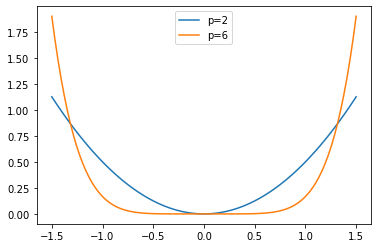

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1.5,1.5,100)
plt.plot(x, pow(x,2)/2.,label='p=2')
plt.plot(x, pow(x,6)/6.,label='p=6')
plt.legend()
plt.show()

## Euler Methods

The problem is how to solve for $y$ in the differential equation

$$\frac{dy}{dt} = f(t,y)$$

(Note that if $f(t,y)$ were a function of $t$ alone, we could simply integrate to find $y(t)$.  We will assume that this is not the case.)

As is often the case, inspiration arrives in the form of the Taylor series expansion:

$$y(t+h) = y(t) + hy'(t) + \frac{1}{2!} h^2 y''(t) + \dots$$

(In this form, $y(t)$ means "$y$ evaluated at the time $t$" and **not** "$y$ is strictly only a function of $t$.")

Even though the Taylor series uses $y'$, we can see from the original differential equation that $y' = f$.
Therefore we can rewrite the series as **Euler's method**:

$$y(t+h) \approx y(t) + hf(t) + \mathcal{O}(h^2)$$

You may recognize this same equation as the forward-difference algorithm for the derivative

$$\frac{y(t+h)-y(t)}{h} \approx f(t) = \frac{dy}{dt}$$

but in this application we are interested in the evolution of $y$, not $dy/dt$.

Some authors, including Landau *et al.*, focus on time as a series of steps $t_n$, and they write the function evaluations as discrete steps, too.
In that notation, 
$y_n = y(t_n)$ is the value of $y$ at time $t_n$.
We will try to use that notation for consistency from now on.

$$y_{n+1} \approx y_n + hf(t_n, y_n)$$

This is an example of an **explicit** method, in which $y_{n+1}$ is given entirely in terms of already-calculated $y_n$.

Just like the forward-difference derivative, Euler's method has a local error for each step of $\mathcal{O}(h^2)$.
If there are $N \sim 1/h$ steps, then the total error for the method scales as $N\mathcal{O}(h^2) =  \mathcal{O}(h)$.

This can be seen in the figure below.  Note that it is not only $h$, but also $y''=f'$, that determine the total error.  If $y$ is a linear function, then $y''=0$, and Euler's method at first order is exact.

<img src="Figures/Figure_8.4.png" width="50%">

Euler's method is sometimes referred to as a "Taylor series method of order 2" because two Taylor terms are used.
A higher-order Euler method can be derived by returning to the Taylor series and retaining the $y''$ term:

$$y_{n+1} = y_n + h y'(t) + \frac{1}{2!} h^2 y''(t) + \mathcal{O}(h^3)$$

It is simple enough to write $y'(t) = f(t,y)$, but what about $y''(t)$?

$$y''_n = \frac{df}{dt}(t_n, y_n) = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y}\frac{dy}{dt} = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y} f $$

so that all of the functions and derivatives have to be evaluated at $(t_n, y_n)$.
This method will have a local error of $\mathcal{O}(h^3)$ and global error of $\mathcal{O}(h^2)$, but it is not easy to implement the derivatives when $f$ is a very complicated function.

### Example of Euler's method

Let's take the example $x' = 1+x^2+t^3$, with an initial value $x(1)=-4$.
What is the value of $x$ at $t=2$?

x(t=2)= 4.234618299300086


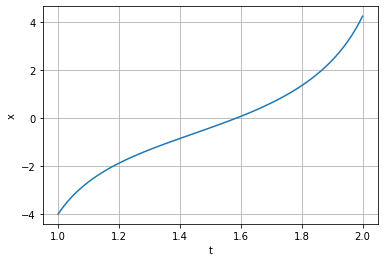

In [2]:
# Euler's method (first order)

def f(x, t):
    return 1 + pow(x,2) + pow(t,3)
    
N = 100
t_values = np.linspace(1., 2., N)
h = t_values[1] - t_values[0]
x_values = np.zeros(N)
x_values[0] = -4.
for i in range(N-1):
    x_values[i+1] = x_values[i] + h * f(x_values[i], t_values[i])
print("x(t=2)=", x_values[-1])
plt.plot(t_values, x_values)
plt.xlabel('t')
plt.ylabel('x')
plt.grid()
plt.show()

## Adams-Bashforth multistep explicit method

A different way of increasing the accuracy of the "explicit" methods is to sample the function at more points, rather than just at $t_n$.
Such methods are called **multistep** methods.

Simple integration of the differential equation gives

$$y_{n+1} = y_n + \int_{t_n}^{t_{n+1}} f(t,y) dt$$

This looks promising, but we don't actually know $f(t,y)$ over the entire step.
We can, however, use values $y_n$ and $y_{n-1}$ to *estimate* $f$ over the interval.
This will be a *linear* extrapolation from the two previous measurements.

$$f \approx \frac{t - t_{n-1}}{h} f_n - \frac{t - t_n}{h} f_{n-1} + \mathcal{O}(h^2)$$

(Double-check to see that this works at the endpoints of the interval and at the midpoint.)

Assuming that this approximation holds over the interval, we can use it in the integral equation and perform the integral **explicitly**.

The result is the 2-step **Adams-Bashforth method**:

$$y_{n+1} = y_n + h\left( \frac{3}{2} f_n - \frac{1}{2} f_{n-1} \right) + \mathcal{O}(h^3)$$

It is called "2-step" because the function $f$ is evaluated at two steps: $f_n = f(t_n, y_n)$ and $f_{n-1} = f(t_{n-1}, y_{n-1})$.


x(t=2)= 4.24900678351203


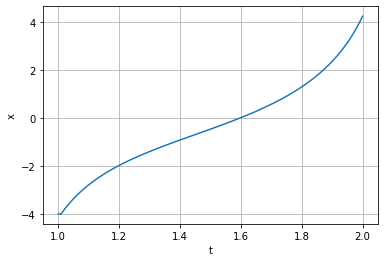

In [3]:
# Adams-Bashforth method (second order)

def f(x, t):
    return 1 + pow(x,2) + pow(t,3)

N = 100
t_values = np.linspace(1., 2., N)

h = t_values[1] - t_values[0]
x_values = np.zeros(N)
x_values[0] = -4.
x_values[1] = -4.
for i in range(1, N-1):
    x_values[i+1] = x_values[i] + h * (1.5*f(x_values[i], t_values[i]) - 0.5*f(x_values[i-1], t_values[i-1]))
print("x(t=2)=", x_values[-1])
plt.plot(t_values, x_values)
plt.xlabel('t'); plt.ylabel('x')
plt.grid()
plt.show()

## Bashforth-Moulton multistep implicit method

The multistep Adams-Bashforth explicit method can be contrasted with **implicit** methods that require solution of an equation in $y$.

For example, if we use the central difference approximation for $f=y'$, we could write

$$\frac{y_{n+1}-y_n}{h} \approx \frac{1}{2}\left[ f_n + f_{n+1} \right]$$

where we have approximated the derivative $f$ at the interval midpoint as the average of the derivative at the two endpoints.

Then the implicit equation is

$$y_{n+1} \approx y_n + \frac{1}{2}h \left[f(t_n, y_n) + f(t_{n+1}, y_{n+1})\right]$$

which has $y_{n+1}$ on both the left- and right-hand sides.
This seems like a pretty tricky equation, and our main method for solving it is a kind of Newton-Raphson method.
But this equation has to be re-solved for each integration (time) step!

## Predictor-Corrector Method (Adams-Bashforth-Moulton 3rd/4th order)

Implicit methods are not usually used by themselves to solve the differential equation.

Instead, the two methods above can be combined by using the explicit method to generate a *prediction* for the next time step and the implicit method to check on the correction and get a *correction*.
The combination is called the *predictor-corrector method*.
The size of the correction gives some idea of the size of the local error.

The following coefficients are an implementation of the Adams-Bashforth-Moulton predictor-correction scheme.
$$\begin{align}
                \mathbf{y}_{n+1} & =  \mathbf{y}_{n} + \frac{1}{6}(\mathbf{k}_{0} +
                2\mathbf{k}_{1} + 2 \mathbf{k}_{2} + \mathbf{k}_{3}) ,      \\
         \mathbf{k}_{0} & =  h \mathbf{f}(t_{n},\ \mathbf{y}_{n}),                \hspace{15ex}
                \mathbf{k}_{1} = h \mathbf{f}(t_{n}+\frac{h}{2},\
\mathbf{y}_{n}+\frac{\mathbf{k}_{0}}{2}) ,   \\
 \mathbf{k}_{2} & =  h \mathbf{f}(t_{n}+\frac{h}{2},\ \mathbf{y}_{n}+\frac{\mathbf{k}_{1}}{2}),                                              \hspace{5ex}
        \mathbf{k}_{3} = h \mathbf{f}(t_{n}+h,\ \mathbf{y}_{n}+\mathbf{k}_{2}) .
 \end{align}$$
 
We will provide the implementation of the ABM predictor-corrector method next time.

## Runge-Kutta Rule

Although no one algorithm is good for solving all ODE’s, the
fourth-order Runge-Kutta algorithm, commonly known as `rk4`, or its extension with
adaptive step size, `rk45`, has proven to be robust and capable of
industrial-strength work. In spite of `rk4` being our recommended
standard method, we derive the simpler `rk2` here, and just state the
result for `rk4`.

The Runge-Kutta algorithms for integrating a differential equation are based
upon the formal (exact) integral of our differential equation:

$$\begin{align}
\frac{dy}{dt} = f(t,y) \quad &\Rightarrow  \quad y(t) = \int f(t,y) dt \\
     \Rightarrow \quad  &y_{n+1} = y_{n} + \int_{t_{n}}^{t_{n+1}} f(t,y) dt.
 \end{align}$$

So far, this is exactly the same as what we tried for the Adams-Bashforth method, where we created a linear approximation to $f$ from the two endpoints.

But now, to derive the second-order Runge-Kutta algorithm `rk2` , we expand $f(t,y)$ in a Taylor series about the
*midpoint* of the integration interval and retain two terms:

$$f(t,y) \simeq f(t_{n+1/2}, y_{n+1/2}) + (t-t_{n+1/2})
        \frac{df}{dt}(t_{n+1/2})        +  {\mbox{$\cal O$}}(h^2)$$

This is still a linear approximation, but fixed at the midpoint value instead of the endpoint values.

Because $(t − t_{n + 1/2})$ raised to any odd power is
equally positive and negative over the interval
$t_n \leq t \leq t_{n + 1}$, the integral of the
$(t − t_{n + 1/2})$ term vanishes and we obtain
our algorithm for `rk2`:

$$\begin{align}
 \int_{t_{n}}^{t_{n+1}}  f(t,y)  dt &\simeq    f (t_{n+1/2},\
y_{n+1/2}) h + {\mbox{$\cal O$}}(h^3),\\
\Rightarrow\quad    y_{n+1} &\simeq y_{n} + h f(t_{n+1/2},\
y_{n+1/2}) + \mbox{$\cal O$}(h^3)
\quad\mbox{(rk2)}.
\end{align}$$

We see that while `rk2` contains the same number of terms as Euler’s rule, it
obtains a higher level of precision by taking advantage of the cancellation of the
$\mathcal{O}(h)$ terms. 
The price for this improved precision is having to
evaluate the derivative function and the solution $y$ at the middle of the time
interval, $t_{n+1/2} = t_{n}+h/2$.
Unfortunately, we do not
know the value of $y_{n + 1/2}$ and cannot use this algorithm to
determine it. The way out of this quandary is to use Euler’s method (first order) to
approximate $y_{n + 1/2}$:

$$y_{n+1/2} \approx y_{n} + \frac{1}{2} h \frac{dy}{dt}
    =    y_{n}  + \frac{1}{2} h f(t_{n},\ y_{n}).$$

But this was only to find $y_{n+1/2}$!

Then we have to evaluate the derivative function $f$ at the new "approximate $y_{n+1/2}$ we just found.
That evaluation and the other pieces come together to 
give the complete `rk2` algorithm: 

$$\begin{align}
 \mbox{} &   y_{n+1} \ \simeq\
y_{n} + k_{2} \\
 &  k_{2} = h f\left(t_{n} +    \frac{h} {2},\
y_{n} + \frac{k_{1}} {2}\right), \quad
        k_{1} = h   f(t_{n},\
        y_{n}),\end{align}$$

We
see that the known derivative function $f$ is evaluated at the ends (end??)
and the midpoint of the interval, but that only the (known) initial
value of the dependent variable $y$ is required. This makes the
algorithm self-starting.

x(t=2)= 4.365332495817935


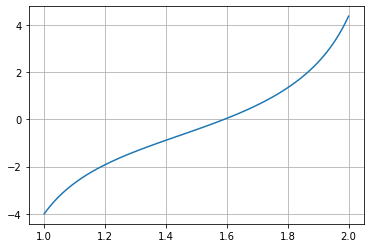

In [4]:
# Runge-Kutta 2 method, good to order O(h^3)

def f(t,x):
    return 1 + pow(x,2) + pow(t,3)

N = 100
t_values = np.linspace(1., 2., N)
h = t_values[1] - t_values[0]
x_values = np.zeros(N)
x_values[0] = -4.
for i in range(N-1):
    k1 = h * f(t_values[i], x_values[i])
    k2 = h * f(t_values[i]+h/2., x_values[i]+k1/2.)
    x_values[i+1] = x_values[i] + k2
print("x(t=2)=", x_values[-1])
plt.plot(t_values, x_values)
plt.grid()
plt.show()

The fourth-order Runge-Kutta method `rk4` obtains
$\mathcal{O}(h^4)$ precision by approximating $y$ as a Taylor series up to
$h^2$ (a parabola) at the midpoint of the interval, which again leads
to cancellation of lower-order error. `rk4` provides an excellent balance of
power, precision, and programming simplicity. There are now four gradient
($k$) terms to evaluate, with four subroutine calls. This provides an improved
approximation to $f(t, y)$ near the midpoint. Although `rk4` is
computationally more expensive than the Euler method, its precision is much
better, and some time is saved by using larger values for the step size *h*.
Explicitly, `rk4` requires the evaluation of four intermediate slopes, and these
are approximated with the Euler algorithm:

$$\begin{align}
y_{n+1} &= y_{n} + \frac{1}{6}(k_{1} +
2k_{2} + 2 k_{3} + k_{4}),&&\\
k_{1} &= h f(t_{n}, y_{n}), \quad
&k_{2} &= h f\!\left(t_{n}+\frac{h}{2},
y_{n}+\frac{k_1}{2}\right),  \\
k_{3} &= h f\!\left(t_{n}+\frac{h}{2},
y_{n}+\frac{k_2}{2}\right),\quad &
k_{4} &= h f(t_{n}+h,
y_{n}+k_{3}).
 \end{align}$$


### rk4.py, Notebook Version

4.371220810723883


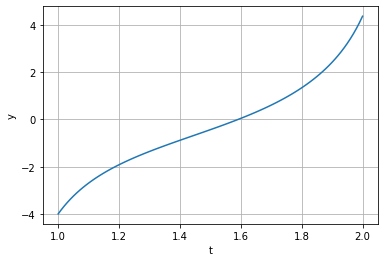

In [5]:
# rk4.py, Notebook Version

import matplotlib.pyplot as plt          #Load Matplotlib

#   Initialization
a = 1.
b = 2.
n = 100                                          
tt=np.zeros(n)
yy=np.zeros(n)
y = -4.
t = a
tt[0]=t
yy[0]=y
h = (b-a)/(n-1);

def f(t, y):
    return 1 + pow(y,2) + pow(t,3)

j=0
while (t < b):                          # Time loop
    if ( (t + h) > b ): 
        h = b - t                       # Last step
    k1 = h * f(t, y)
    k2 = h*f(t + h/2., y + k1/2.)
    k3 = h*f(t + h/2., y + k2/2.)
    k4 = h*f(t + h, y + k3)
    y = y + (k1 + 2.*(k2 + k3) + k4)/6.
    j+=1 
    t+=h
    tt[j]=t
    yy[j]=y  
        
print(yy[-1])
plt.plot(tt,yy) 
plt.grid(True)
plt.ylabel('y')
plt.xlabel('t')
plt.show()